In [1]:
!pip install ultralytics
!pip install opencv-python
!pip install matplotlib
!pip install numpy
!pip install pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [3]:
import zipfile, os

zip_path = "/content/Tumor Detection.v8i.yolov11.zip"
extract_to = "/content/tumor_data"

# Unzip
os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"✅ Extracted to: {extract_to}")


✅ Extracted to: /content/tumor_data


In [ ]:
for root, dirs, files in os.walk(extract_to):
    level = root.replace(extract_to, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')


In [5]:
# Automatically find data.yaml
yaml_path = None
for root, dirs, files in os.walk(extract_to):
    if "data.yaml" in files:
        yaml_path = os.path.join(root, "data.yaml")
        break

if yaml_path:
    print(f"✅ Found data.yaml at: {yaml_path}")
else:
    print("❌ data.yaml not found. Please check your dataset structure.")


✅ Found data.yaml at: /content/tumor_data/data.yaml


In [6]:
from ultralytics import YOLO, SAM

yolo_model = YOLO("yolov8n.pt")  # Can change to yolov8m.pt or yolov8l.pt for better accuracy
sam_model = SAM("sam2_b.pt")

print("✅ Models loaded!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 128MB/s]


100%|██████████| 154M/154M [00:01<00:00, 122MB/s]


✅ Models loaded!


In [7]:
results = yolo_model.train(
    data=yaml_path,
    epochs=20,
    imgsz=640,
    device=0,       # Use GPU
    batch=16,
    patience=8,
    save=True,
    name="tumor_yolov11_training"
)


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tumor_data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tumor_yolov11_training, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=8, perspective=0.0, plots=True, pose=12.

100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

 21                  -1  1    493056  ultralytics.nn.modules.block.C2f             [384, 256, 1]                 
 22        [15, 18, 21]  1    752287  ultralytics.nn.modules.head.Detect           [5, [64, 128, 256]]           
Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 92.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1151.9±378.3 MB/s, size: 34.0 KB)


train: Scanning /content/tumor_data/train/labels... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<00:00, 2023.55it/s]

train: /content/tumor_data/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
train: New cache created: /content/tumor_data/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 243.3±223.2 MB/s, size: 29.4 KB)


val: Scanning /content/tumor_data/valid/labels... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<00:00, 998.75it/s]

val: New cache created: /content/tumor_data/valid/labels.cache


Plotting labels to runs/detect/tumor_yolov11_training/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/tumor_yolov11_training
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.09G     0.9095      2.829      1.244         13        640: 100%|██████████| 86/86 [00:26<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        395        415      0.956      0.208      0.409      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.56G     0.8994      1.839      1.219         16        640: 100%|██████████| 86/86 [00:24<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.59it/s]


                   all        395        415      0.773      0.393      0.404       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.58G     0.9646      1.589      1.272         24        640: 100%|██████████| 86/86 [00:24<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.88it/s]


                   all        395        415      0.787      0.404      0.484      0.342

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.61G     0.9403      1.448      1.249         18        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]


                   all        395        415      0.597      0.464      0.473      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.62G     0.9063       1.27      1.225         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.71it/s]

                   all        395        415      0.759      0.498      0.526      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.64G     0.8769      1.128      1.212         21        640: 100%|██████████| 86/86 [00:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.05it/s]

                   all        395        415      0.799       0.57      0.604      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.65G     0.8473      1.037        1.2         15        640: 100%|██████████| 86/86 [00:22<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.79it/s]

                   all        395        415       0.73      0.521      0.552      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.68G     0.8387     0.9931      1.196         18        640: 100%|██████████| 86/86 [00:23<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.33it/s]

                   all        395        415      0.703      0.546      0.593      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.68G     0.7953     0.9018      1.152         21        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.79it/s]

                   all        395        415      0.839      0.585      0.613       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.71G     0.7935     0.8835      1.169         19        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.98it/s]

                   all        395        415      0.747      0.556      0.595      0.459


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.72G     0.7143     0.8931      1.134         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.94it/s]

                   all        395        415      0.779      0.566      0.592       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.75G     0.6676     0.7871      1.112         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.95it/s]

                   all        395        415      0.859      0.601      0.648      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.75G     0.6422     0.7331      1.095         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.78it/s]

                   all        395        415      0.837      0.586      0.638      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.78G     0.6276     0.6725      1.086         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.12it/s]

                   all        395        415      0.815      0.594       0.63      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.79G     0.5991     0.6559      1.061         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.97it/s]

                   all        395        415      0.856      0.611      0.637      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.81G     0.5868     0.6048      1.052         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.04it/s]

                   all        395        415      0.848       0.61      0.645      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.82G     0.5691     0.5744      1.041         12        640: 100%|██████████| 86/86 [00:22<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.68it/s]

                   all        395        415      0.859      0.606      0.655      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.85G       0.54     0.5478      1.017         11        640: 100%|██████████| 86/86 [00:22<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.56it/s]

                   all        395        415      0.865      0.645      0.672      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.86G     0.5302     0.5121      1.017         10        640: 100%|██████████| 86/86 [00:21<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.08it/s]

                   all        395        415       0.89      0.628      0.672      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.88G     0.5164     0.4881      1.015         10        640: 100%|██████████| 86/86 [00:22<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.00it/s]

                   all        395        415      0.871      0.641      0.668      0.545



20 epochs completed in 0.153 hours.
Optimizer stripped from runs/detect/tumor_yolov11_training/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/tumor_yolov11_training/weights/best.pt, 6.2MB

Validating runs/detect/tumor_yolov11_training/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.63it/s]


                   all        395        415       0.89       0.63      0.672      0.547
              NO_tumor        115        116      0.903      0.966      0.962      0.786
                glioma         30         36      0.826      0.583      0.674      0.484
            meningioma        144        148      0.922      0.879      0.948      0.833
             pituitary        106        111      0.798      0.721      0.777      0.632
space-occupying lesion-          1          4          1          0          0          0
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/tumor_yolov11_training


📈 Showing: results.png


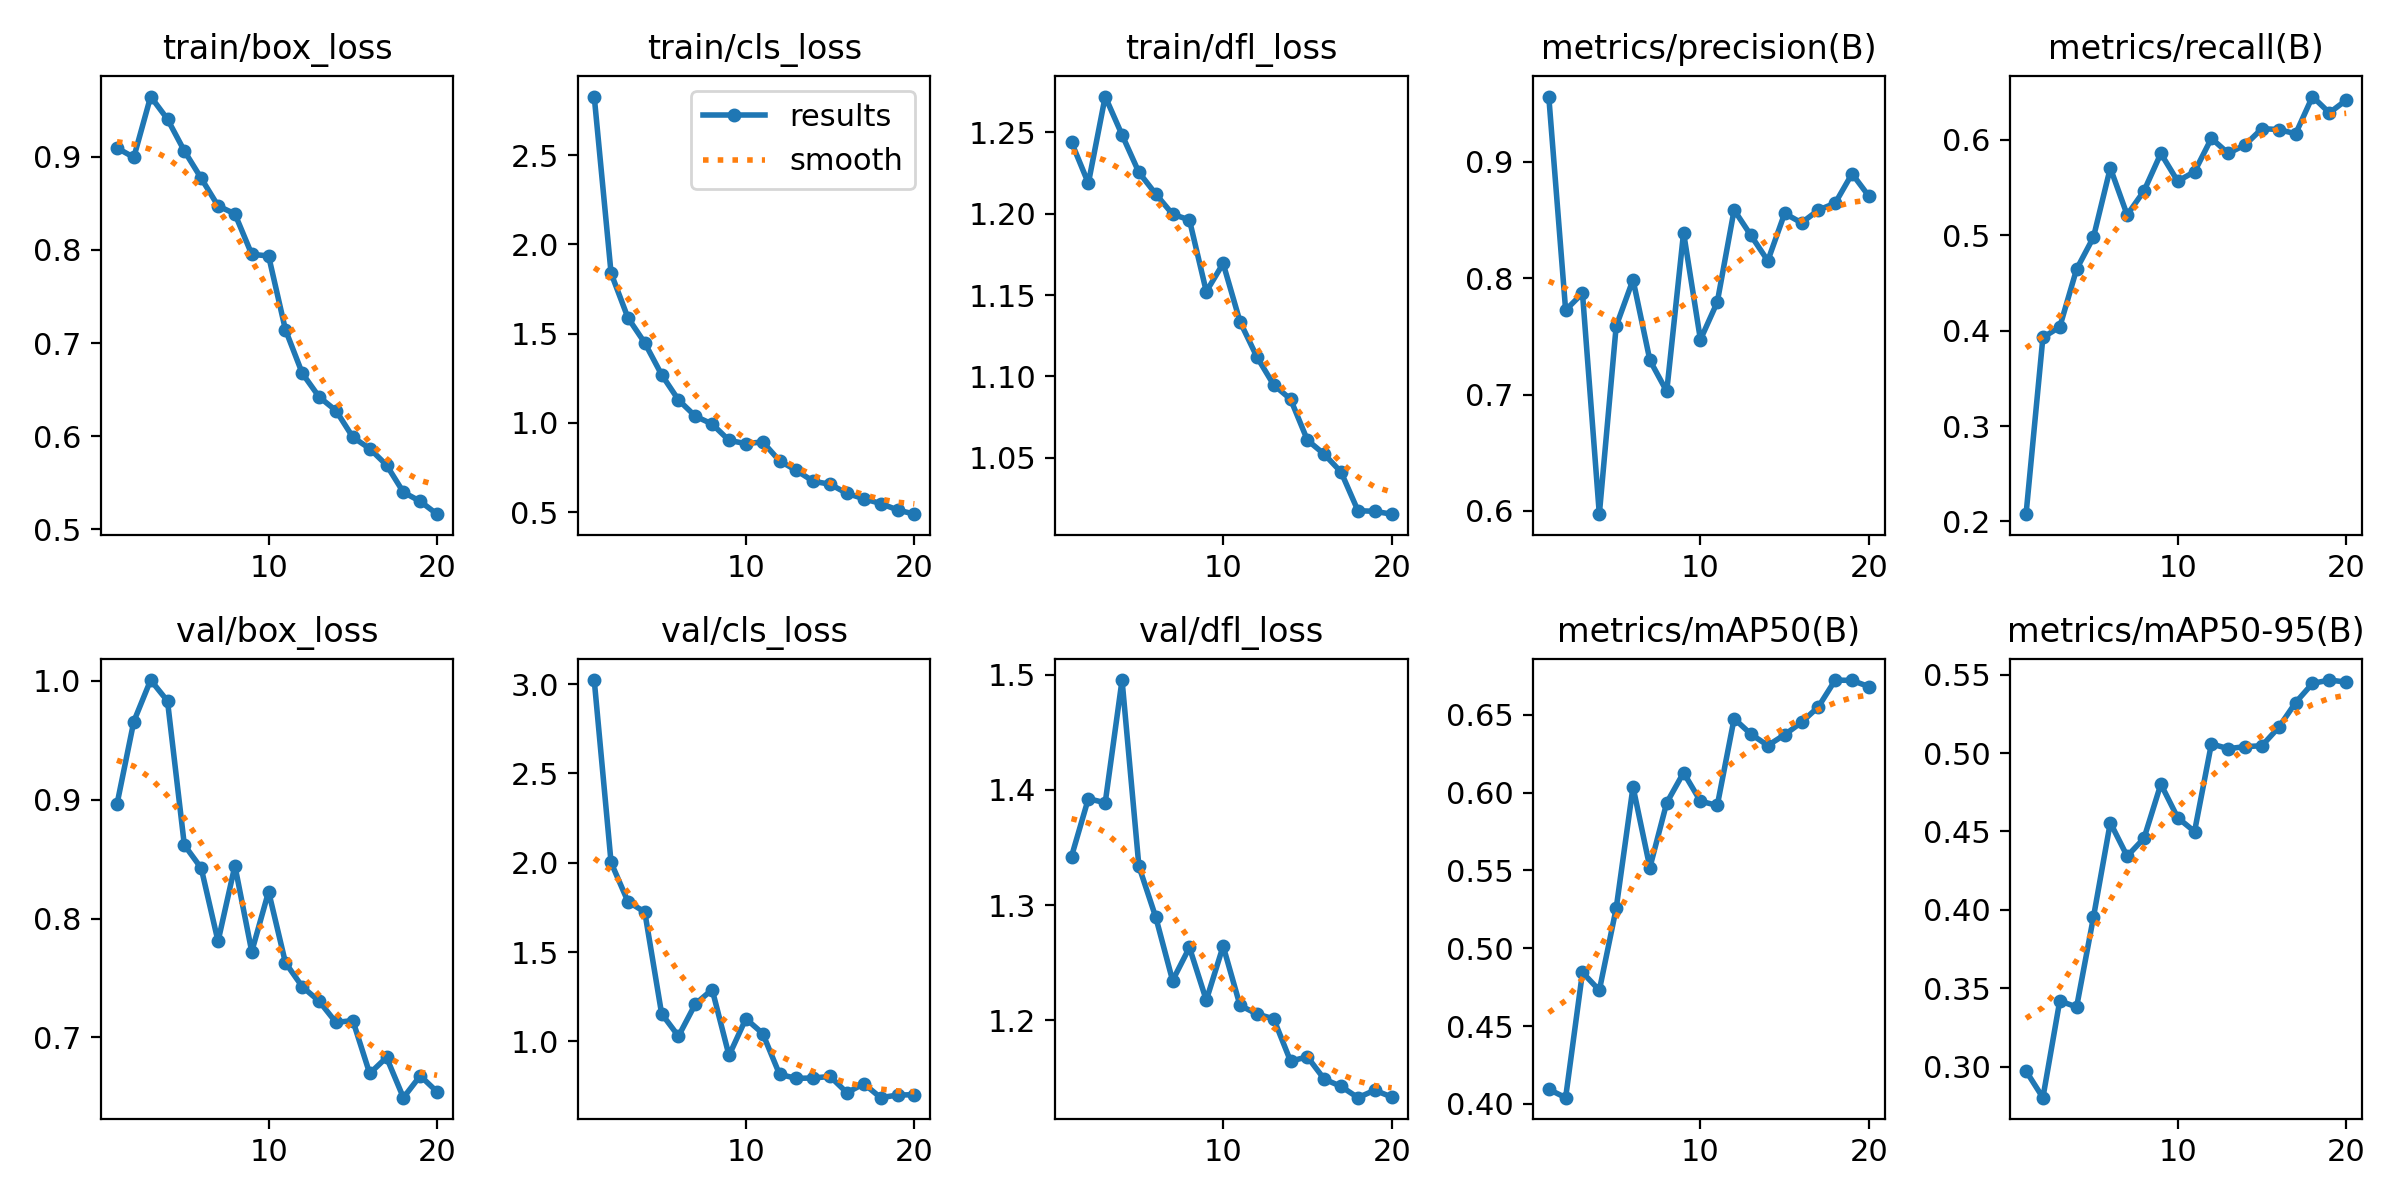

📈 Showing: confusion_matrix.png


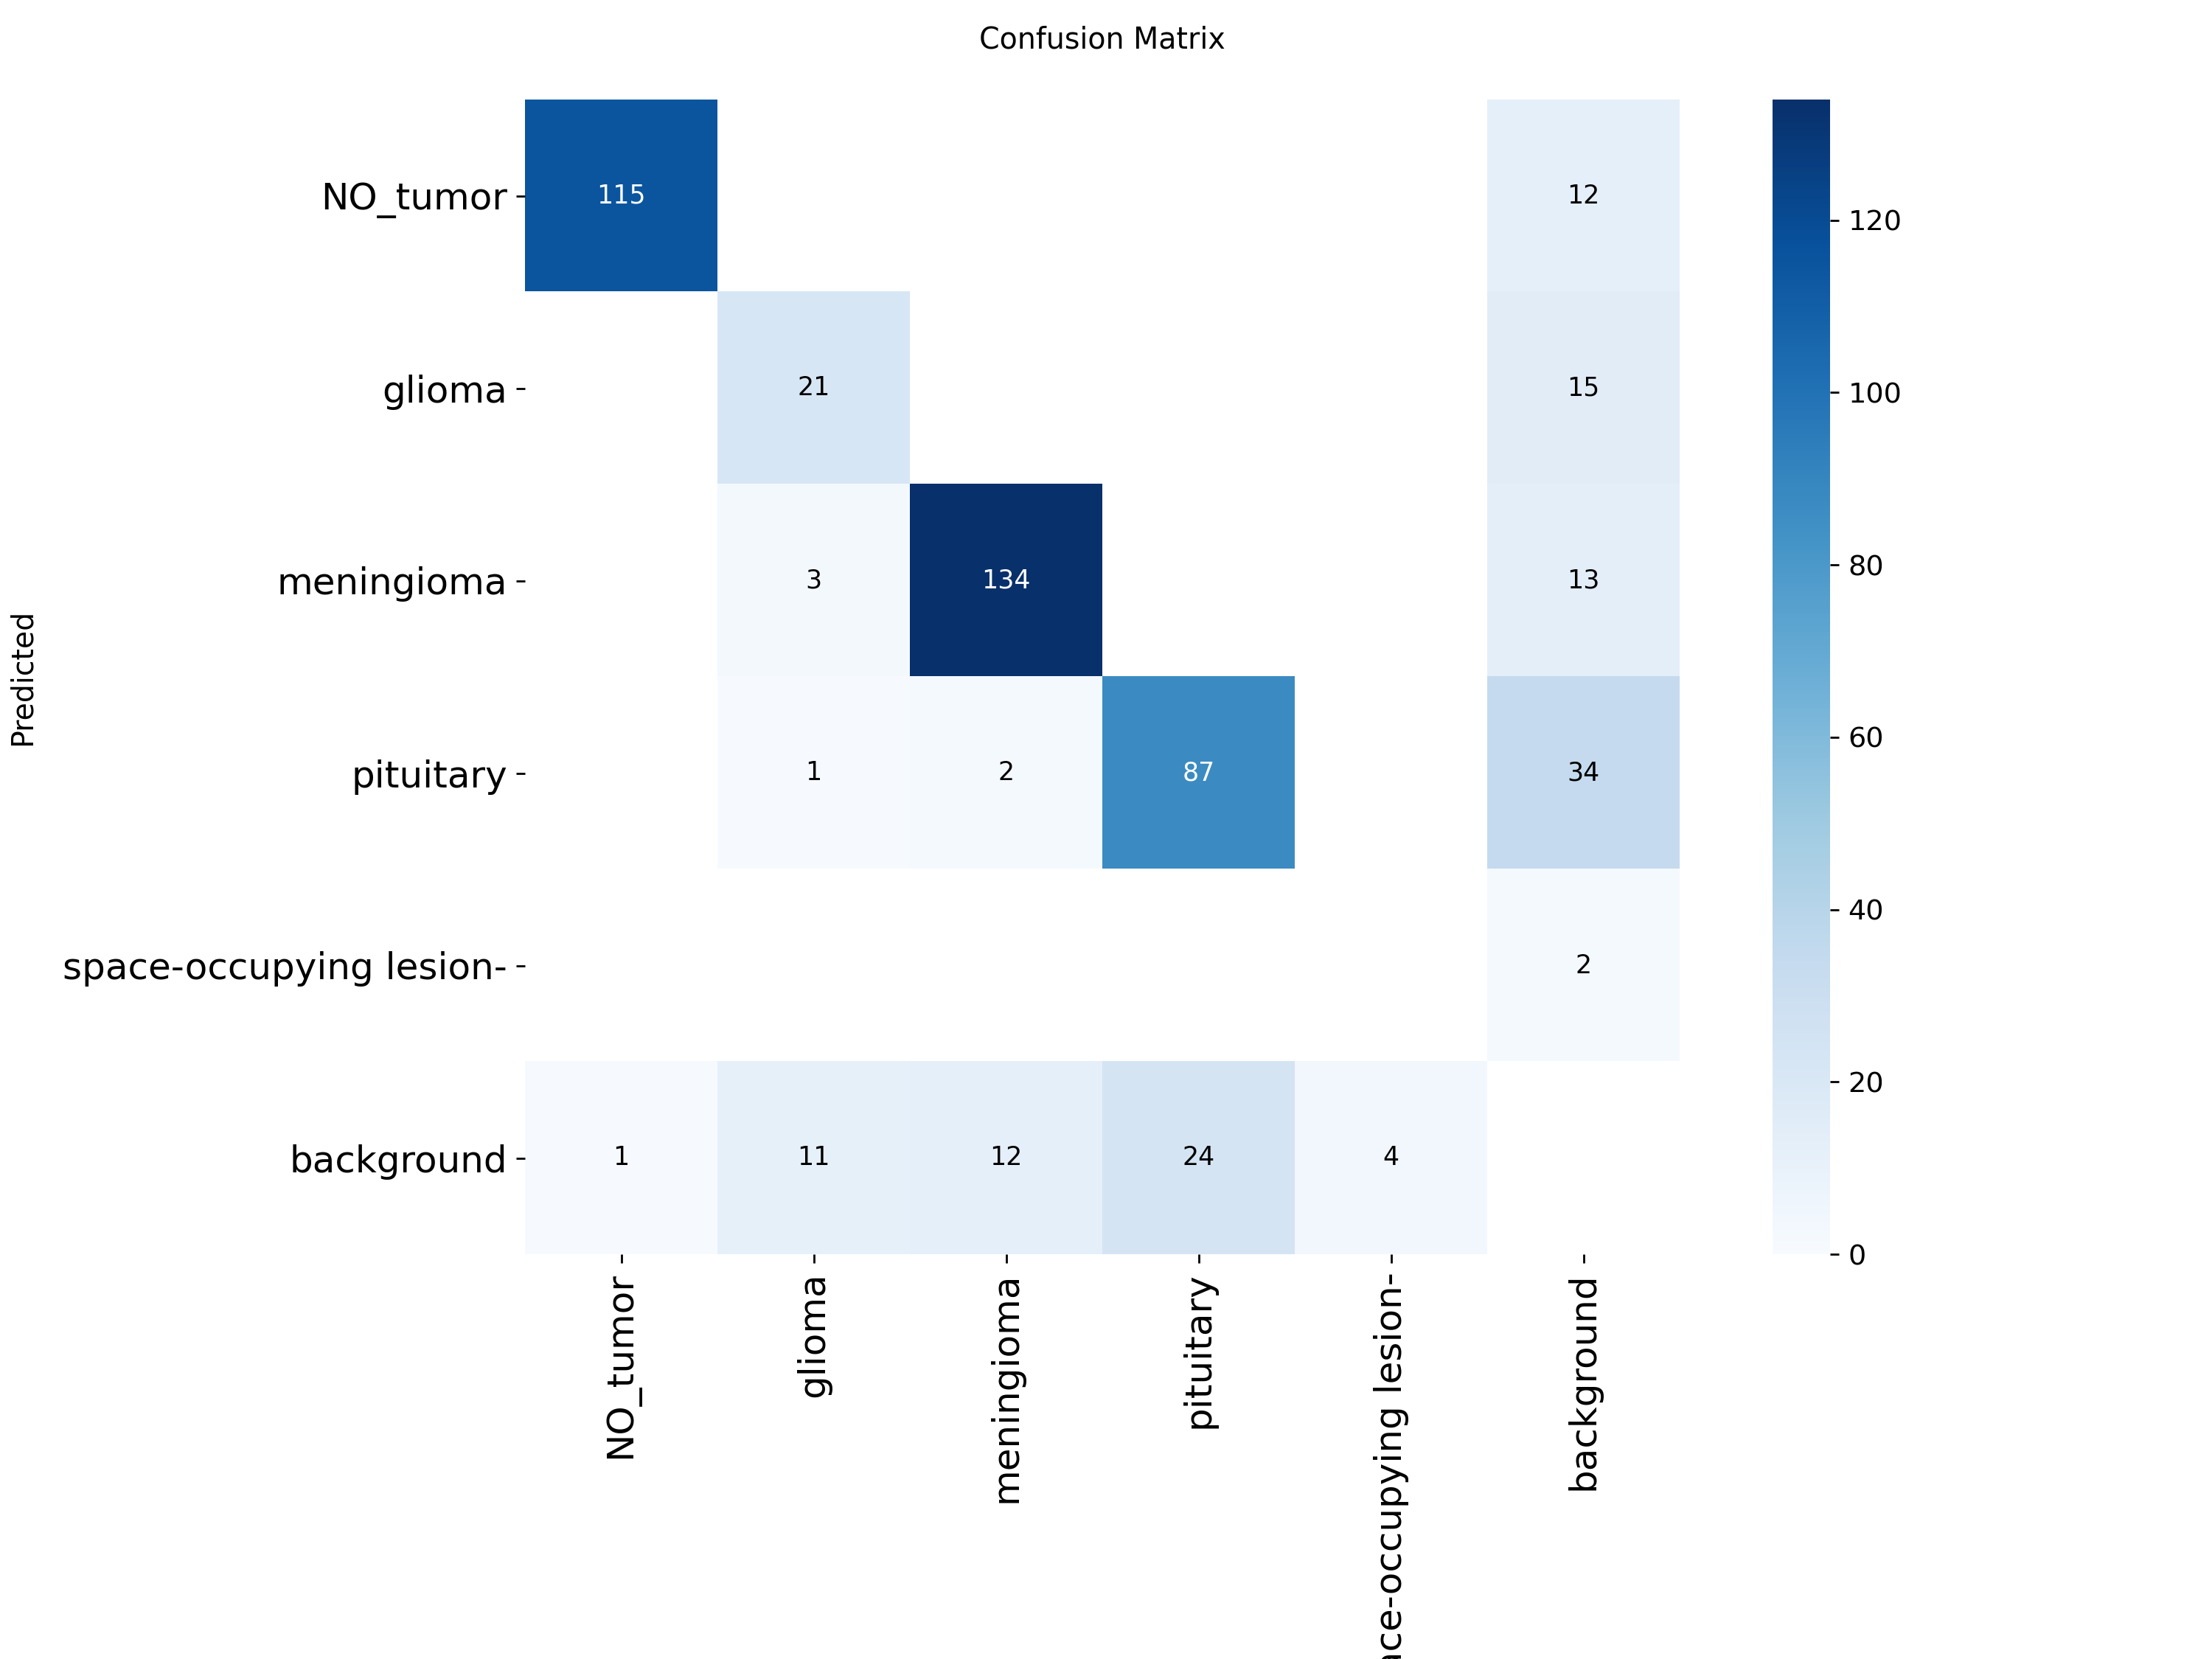

⚠️ Plot not found: runs/detect/tumor_yolov11_training/val_batch0_pred.png


In [8]:
from IPython.display import Image, display
import os

result_dir = "runs/detect/tumor_yolov11_training"
plots = [
    "results.png",
    "confusion_matrix.png",
    "val_batch0_pred.png"
]

for file in plots:
    plot_path = os.path.join(result_dir, file)
    if os.path.exists(plot_path):
        print(f"📈 Showing: {file}")
        display(Image(filename=plot_path))
    else:
        print(f"⚠️ Plot not found: {plot_path}")


In [9]:
from ultralytics import YOLO, SAM

# Load best trained model + segmentation model
trained_model = YOLO("runs/detect/tumor_yolov11_training/weights/best.pt")
sam_model = SAM("sam2_b.pt")

# Sample image (change to your actual image path)
test_image = "/content/tumor_data/valid/images/pituitary_878_jpg.rf.208922f4eef293b44c8ab463033157a6.jpg"  # <--- replace with a real image name from your test set

# Detect objects
results = trained_model(test_image, verbose=False)

# Segment with SAM2
for r in results:
    if r.boxes:
        boxes = r.boxes.xyxy
        masks = sam_model(r.orig_img, bboxes=boxes, save=True, device=0)
        print(f"🧠 Segmentation done — {len(masks)} masks generated.")
    else:
        print("⚠️ No objects detected.")


0: 1024x1024 1 0, 1 1, 435.1ms
Speed: 12.7ms preprocess, 435.1ms inference, 7.6ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict
🧠 Segmentation done — 1 masks generated.


In [10]:
import os
from ultralytics import YOLO, SAM
from glob import glob

# Load YOLOv11 trained model and SAM2 segmentation model
trained_model = YOLO("runs/detect/tumor_yolov11_training/weights/best.pt")
sam_model = SAM("sam2_b.pt")

# Path to your validation or test image folder
image_folder = "/content/tumor_data/valid/images"  # Replace with your image path
image_paths = glob(os.path.join(image_folder, "*.jpg"))  # or .png depending on format

# Ensure you only take up to 20 images
image_paths = image_paths[:20]

# Output folder for masks
output_dir = "runs/segment/predict"
os.makedirs(output_dir, exist_ok=True)

# Inference and segmentation loop
for idx, image_path in enumerate(image_paths):
    print(f"🔍 Processing image {idx+1}/{len(image_paths)}: {os.path.basename(image_path)}")

    results = trained_model(image_path, verbose=False)

    for r in results:
        if r.boxes:
            boxes = r.boxes.xyxy
            # Save=True will save in `runs/segment/predict` by default
            masks = sam_model(r.orig_img, bboxes=boxes, save=True, device=0)
            print(f"✅ Segmentation complete — {len(masks)} mask(s) saved for {os.path.basename(image_path)}")
        else:
            print(f"⚠️ No tumors detected in {os.path.basename(image_path)}.")


🔍 Processing image 1/20: meningioma_894_jpg.rf.f5e917b9f2acd2761973efb74826bcea.jpg

0: 1024x1024 1 0, 329.8ms
Speed: 7.5ms preprocess, 329.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict2
✅ Segmentation complete — 1 mask(s) saved for meningioma_894_jpg.rf.f5e917b9f2acd2761973efb74826bcea.jpg
🔍 Processing image 2/20: pituitary_497_jpg.rf.aaef3a2853a5dd9e8309eca35811b527.jpg

0: 1024x1024 1 0, 267.6ms
Speed: 7.1ms preprocess, 267.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict2
✅ Segmentation complete — 1 mask(s) saved for pituitary_497_jpg.rf.aaef3a2853a5dd9e8309eca35811b527.jpg
🔍 Processing image 3/20: pituitary_1165_jpg.rf.94e81c2cb82675782dc4e5921be405ab.jpg

0: 1024x1024 1 0, 285.7ms
Speed: 7.1ms preprocess, 285.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict2
✅ Segmentation complete — 1 mask(s) saved 

Showing a few training images:


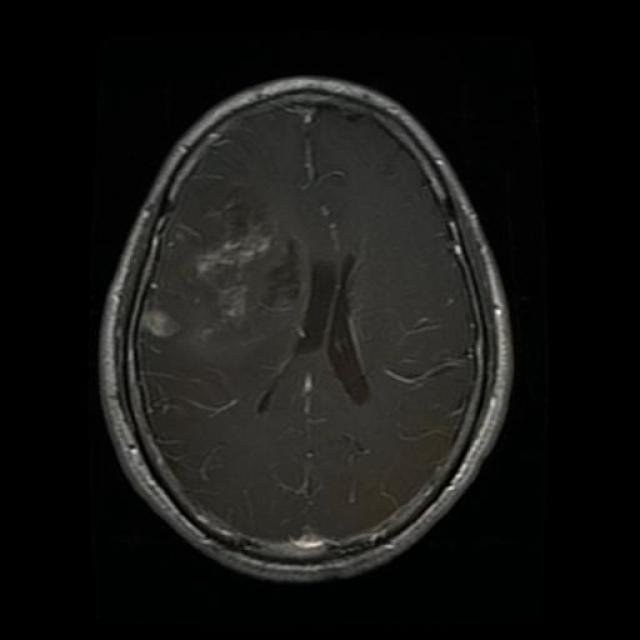

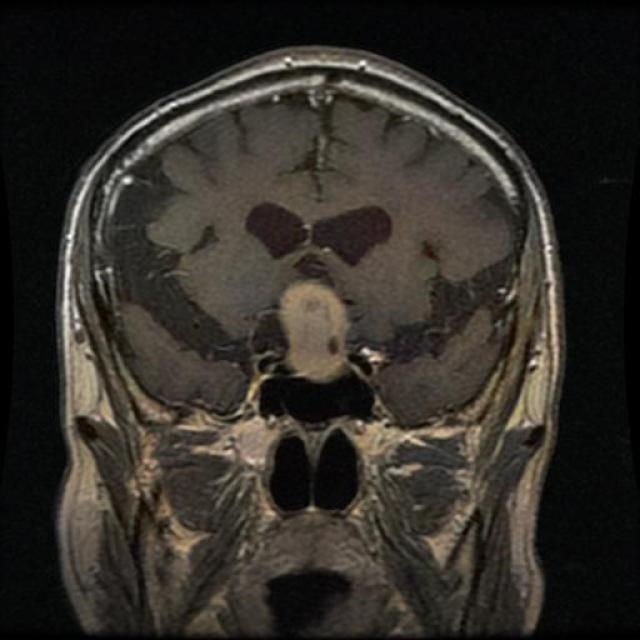

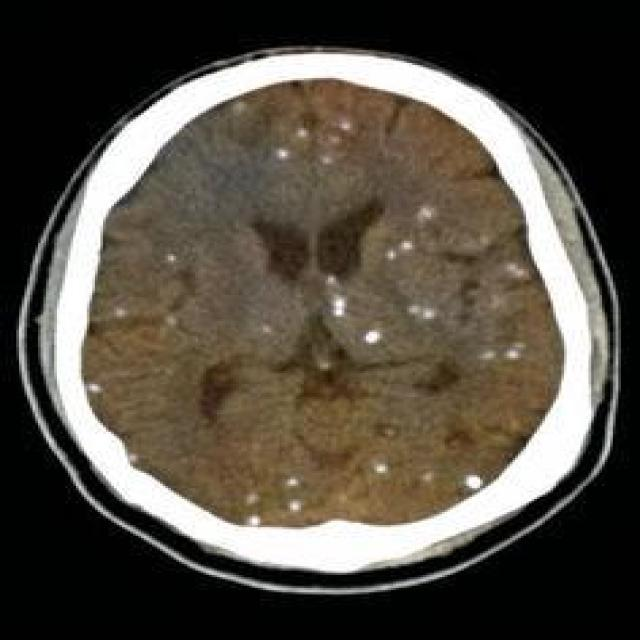

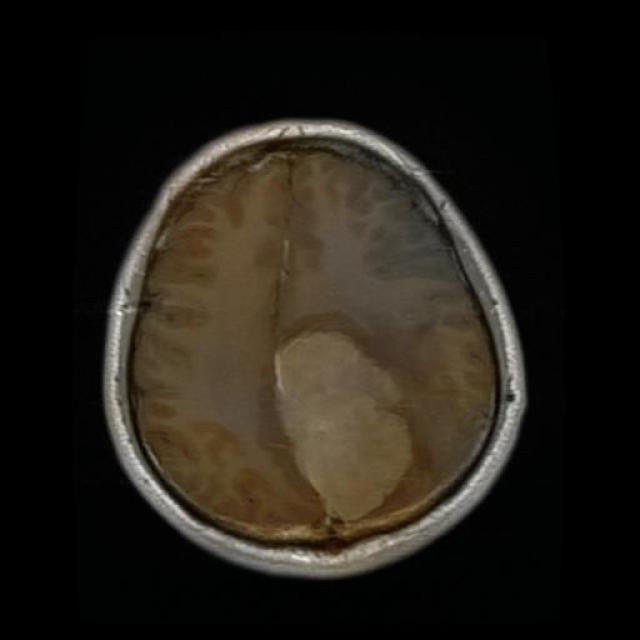

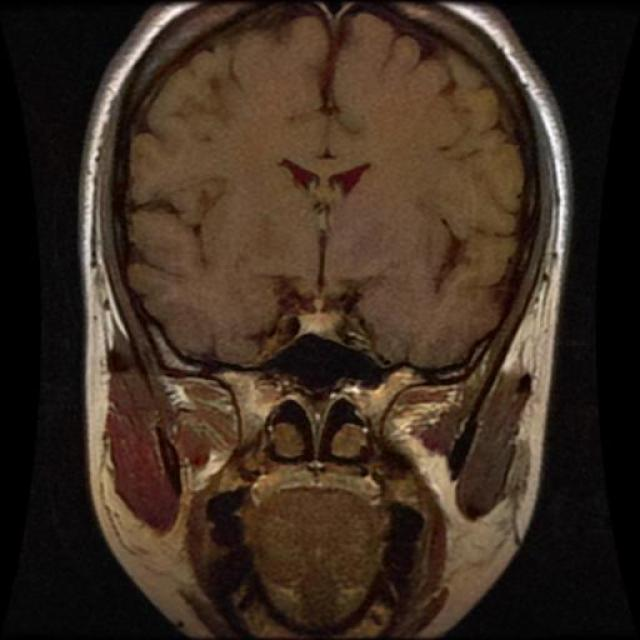

In [11]:
import os
from IPython.display import Image, display

train_image_dir = "/content/tumor_data/train/images"
image_files = [f for f in os.listdir(train_image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if image_files:
    print("Showing a few training images:")
    for image_file in image_files[:5]:  # Display the first 5 images
        image_path = os.path.join(train_image_dir, image_file)
        display(Image(filename=image_path))
else:
    print(f"No image files found in {train_image_dir}")

In [12]:
from google.colab import files
uploaded = files.upload()  # Upload your MRI image (e.g., "my_mri.jpg")


Saving my_mri.jpg.jpg to my_mri.jpg.jpg


In [14]:
my_mri_image = "my_mri.jpg.jpg"  # <-- updated to match uploaded name

# Check file exists
assert os.path.exists(my_mri_image), f"File not found: {my_mri_image}"

# Run detection and segmentation
results = trained_model(my_mri_image, verbose=False)

for r in results:
    if r.boxes:
        boxes = r.boxes.xyxy
        masks = sam_model(r.orig_img, bboxes=boxes, save=True, device=0)
        print(f"🧠 Segmentation done — {len(masks)} mask(s) saved.")
    else:
        print("⚠️ No tumors detected in the image.")



0: 1024x1024 1 0, 357.7ms
Speed: 7.1ms preprocess, 357.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict3
🧠 Segmentation done — 1 mask(s) saved.
